In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
lead = pd.read_csv("Leads.csv")

In [3]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking the shape of the dataset
lead.shape

(9240, 37)

In [5]:
#checking the info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Lots of columns have missing values

In [6]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking for amount of missing values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#checking percentage of missing values
(lead.isnull().sum()/len(lead.index))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

# 1. Data Cleaning

In [9]:
(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
#removing columns with missing values > 40% (around 3500+ entries) as they won't help in analysis

ColsToDelete = ["Lead Quality", "Asymmetrique Activity Index", "Asymmetrique Profile Score", "Asymmetrique Activity Score", 
                "Asymmetrique Profile Index"]

lead.drop(ColsToDelete, axis = 1, inplace = True)

In [11]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see, 5 columns that were not needed have been removed from the dataset

In [12]:
#checking for duplicate values

lead[lead.duplicated()].shape

(0, 32)

No duplicate data is found

In [13]:
#removing more columns that do not contribute any meaning

#Prospect ID (It's just a unique ID given to each user)
#Lead Number (Very similar to prospect ID)

lead.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [14]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [15]:
#checking the value count for each column

for col in lead.columns:
    print(lead[col].value_counts(dropna = False))
    print()
    print("x----------------------------x")
    print()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

x----------------------------x

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

x----------------------------x

No     8506
Yes     734
Name: Do Not Email, dtype: int64

x----------------------------x

No     9238
Yes       2
Name: Do Not Call, dtype

Columns that have 'select' inside:
1. Specialization
2. How did you hear about X Education
3. Lead Profile
4. City

In [16]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
#'select' values need to be treated. These values are almost the same as null values 
#as the user perhaps forgot to choose a value or left it intentionally

#treating each column with 'select separately'

In [18]:
lead["Specialization"].value_counts(dropna = False, normalize = True)*100

Select                               21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [19]:
#We can see this column is very important as it details the specialization of the user
#therefore, we will impute missing values, i.e, 'Select' values as 'Missing'

lead["Specialization"] = lead["Specialization"].replace("Select", "Missing")

In [20]:
lead["Specialization"].value_counts(dropna = False, normalize = True)*100

Missing                              21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [21]:
lead["How did you hear about X Education"].value_counts(dropna = False, normalize = True)*100

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [22]:
#this column has way too many missing values (Select + null values combined is over 75%). 
#The rest of the categories within this column do not contribute much to the overall meaning

#therefore, we can drop the column 

lead.drop("How did you hear about X Education", axis = 1, inplace = True)

In [23]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [24]:
lead["Lead Profile"].value_counts(normalize = True, dropna = False)*100

Select                         44.870130
NaN                            29.318182
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

In [25]:
#similar to the reasons above, we can drop this column as well

lead.drop("Lead Profile", axis = 1, inplace = True)

In [26]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [27]:
lead["City"].value_counts(normalize = True, dropna = False)*100

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [28]:
#This column even without the null values does not contribute much
#dropping this column

lead.drop("City", axis = 1, inplace = True)

In [29]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [30]:
#checking for the remaining null values

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Lead Origin                                       0.000000
Digital Advertisement                             0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.0000

In [31]:
#checking each column with >15% missing values closely

cols = ["Tags", "What matters most to you in choosing a course", "What is your current occupation", "Country", "Specialization"]

for col in cols:
    print(lead[col].value_counts(normalize = True, dropna = False)*100)
    print()
    print("x------------------------------x")
    print()

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [32]:
#the feature 'Tags' looks useful but it has too many null values (>35%). We could remove just the null values and proceed but that may remove a lot of important data.
#therfore, let's drop 'tags'

lead = lead.drop("Tags", axis = 1)

In [33]:
for col in lead.columns:
    print(lead[col].value_counts(normalize = True)*100)
    print()
    print("x---------------x")
    print()

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

x---------------x

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
youtubechannel        0.010865
testone               0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
blog                  0.010865
NC_EDM                0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

x---------------x

No     92.056277
Yes     7.943723
Name: Do Not Email, dt

Categorical columns that have one value in majority (> 90%)
1. Do Not Email
2. Do Not Call
3. Country
4. What matters most to you in choosing a course
5. Search
6. Magazine
7. Newspaper Article
8. X Education Forums
9. Newspaper
10. Digital Advertisement
11. Through Recommendations
12. Receive More Updates About Our Courses
13. Update me on Supply Chain Content
14. Get updates on DM Content
15. I agree to pay the amount through cheque

These columns can be removed as they cleary cannot help in analysis

Also removing Last Activity and Last Notable Activity as they are almost the same and do not contribute anything signficant

In [34]:
#further removing unwanted columns

colsToDelete2 = ["Do Not Email", "Do Not Call", "Country", "What matters most to you in choosing a course", 
                 "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement",
                 "Through Recommendations", "Receive More Updates About Our Courses", 
                 "Update me on Supply Chain Content", "Get updates on DM Content", 
                 "I agree to pay the amount through cheque", "Last Notable Activity", "Last Activity"]

lead.drop(colsToDelete2, axis = 1, inplace = True)

In [35]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Specialization                          7802 non-null   object 
 7   What is your current occupation         6550 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [36]:
#checking for percentage of missing values again

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

What is your current occupation           29.112554
Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Lead Source                                0.389610
Lead Origin                                0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
dtype: float64

5 columns need to be treated for missing values

In [37]:
#Treating "What is your current occupation"

lead["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
lead["What is your current occupation"].value_counts(normalize = True, dropna = False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

This column has 29.1% missing values. We will impute null values as Missing

In [39]:
lead["What is your current occupation"] = lead["What is your current occupation"].fillna("Missing")

In [40]:
#verifying
lead["What is your current occupation"].value_counts(dropna = False)

Unemployed              5600
Missing                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
#checking for percentage of missing values again for all the columns

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Lead Source                                0.389610
Lead Origin                                0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
What is your current occupation            0.000000
A free copy of Mastering The Interview     0.000000
dtype: float64

Four columns left to treat

In [42]:
lead["Specialization"].value_counts(dropna = False, normalize = True)*100

Missing                              21.017316
NaN                                  15.562771
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [43]:
lead["Specialization"] = lead["Specialization"].fillna("Missing")

In [44]:
lead["Specialization"].value_counts(dropna = False, normalize = True)*100

Missing                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [45]:
lead["TotalVisits"].value_counts(dropna = False, normalize = True)*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
23.0      0.064935
21.0      0.064935
24.0      0.054113
27.0      0.054113
25.0      0.054113
22.0      0.032468
28.0      0.021645
29.0      0.021645
26.0      0.021645
141.0     0.010823
41.0      0.010823
55.0      0.010823
115.0     0.010823
32.0      0.010823
54.0      0.010823
42.0      0.010823
251.0     0.010823
74.0      0.010823
43.0      0.010823
30.0      0.010823
Name: TotalVisits, dtype: float64

1.48% are null values


In [46]:
lead["TotalVisits"].mean()

3.445237833681204

In [47]:
#Imputing missing values in TotalVisits with the mean

lead["TotalVisits"] = lead["TotalVisits"].fillna(lead["TotalVisits"].mean())

In [48]:
#checking for percentage of missing values again

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Page Views Per Visit                      1.482684
Lead Source                               0.389610
Lead Origin                               0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [49]:
lead["Lead Source"].value_counts(normalize = True, dropna = False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Social Media          0.021645
Press_Release         0.021645
Live Chat             0.021645
blog                  0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
youtubechannel        0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

In [50]:
#there are two entries for google (Google and google)
#imput null values as missing
#and change google to Google

lead["Lead Source"] = lead["Lead Source"].fillna("Missing")
lead["Lead Source"] = lead["Lead Source"].replace("google", "Google")

In [51]:
lead["Lead Source"].value_counts(normalize = True, dropna = False)*100

Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
Missing               0.389610
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Press_Release         0.021645
Live Chat             0.021645
WeLearn               0.010823
Pay per Click Ads     0.010823
blog                  0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
NC_EDM                0.010823
testone               0.010823
Name: Lead Source, dtype: float64

In [52]:
#checking for percentage of missing values again

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Page Views Per Visit                      1.482684
Lead Origin                               0.000000
Lead Source                               0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
dtype: float64

In [53]:
pd.set_option("display.max_rows", None)

In [54]:
lead["Page Views Per Visit"].value_counts(dropna = True)

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
4.33        9
2.20        9
14.00       9
3.25        8
2.17        8
1.60        8
2.40        6
13.00       6
12.00       5
1.20        5
2.60        4
1.83        4
15.00       4
1.71        4
3.40        4
1.43        4
1.57        3
5.67        3
16.00       3
4.75        3
1.38        3
1.78        3
4.25        3
1.23        2
2.09        2
2.22        2
1.22        2
3.60        2
5.33        2
2.83        2
1.14        2
3.75        2
7.50        2
5.40        2
1.56        2
2.71        2
3.20        2
5.25        2
2.14        1
55.00       1
1.19  

In [55]:
lead["Page Views Per Visit"].mean()

2.3628199494672093

In [56]:
#imputing missing values with the mean as they make up only 1.4% of the total value

lead["Page Views Per Visit"] = lead["Page Views Per Visit"].fillna(lead["Page Views Per Visit"].mean())

In [57]:
#checking for percentage of missing values again

(lead.isnull().sum().sort_values(ascending = False)/len(lead.index))*100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

Everything seems to be in order now

#### Checking the ratio of cleaned data with the raw data (Cleaned data and original data)

In [58]:
(len(lead)/9240)*100

100.0

We have retained 100% of data as columns with many null values were removed or the null values were segregated into an another category named as "missing".

# 2. Exploratory Data Analysis

In [59]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Specialization                          9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


## Univariate Analysis

In [60]:
#for categorical variables

def makePlots(firstPlot, secondPlot):
    plt.figure(figsize = [20, 8])

    plt.subplot(1, 2, 1)
    plt.xticks(rotation = 90)
    sns.countplot(lead[firstPlot])

    plt.subplot(1, 2, 2)
    sns.countplot(lead[secondPlot])
    plt.xticks(rotation = 90)
    plt.show()

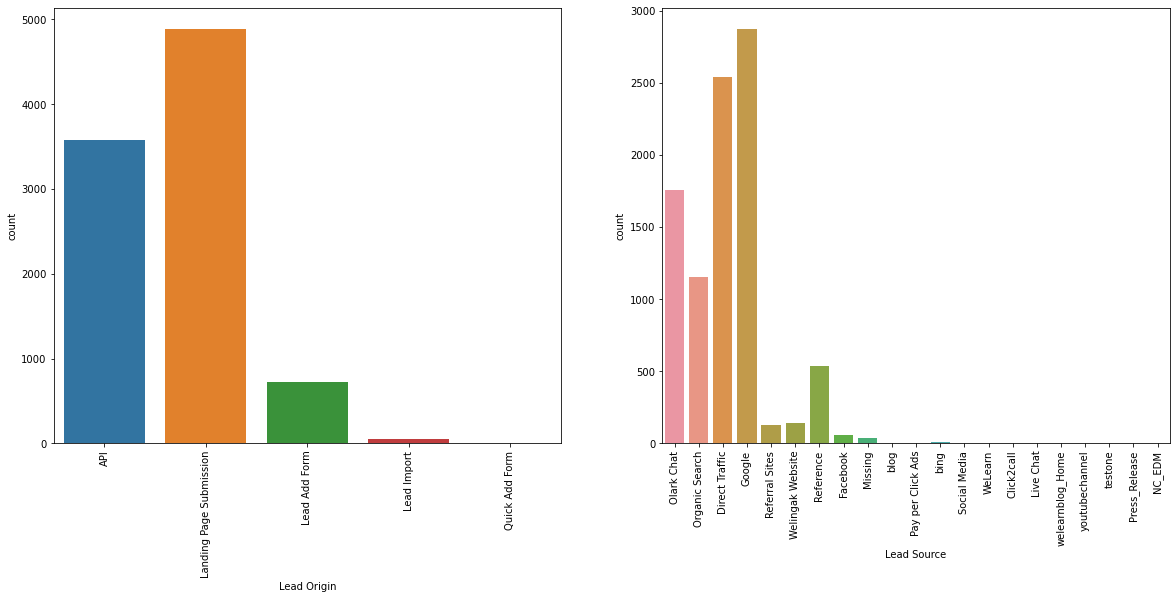

In [61]:
makePlots("Lead Origin", "Lead Source")

Inferences:

We can see most of the lead origins are from landing page submission and API's. 

Most users' sources are google and direct traffic. There are many users whose source corresponds to Olark chat and organic search.

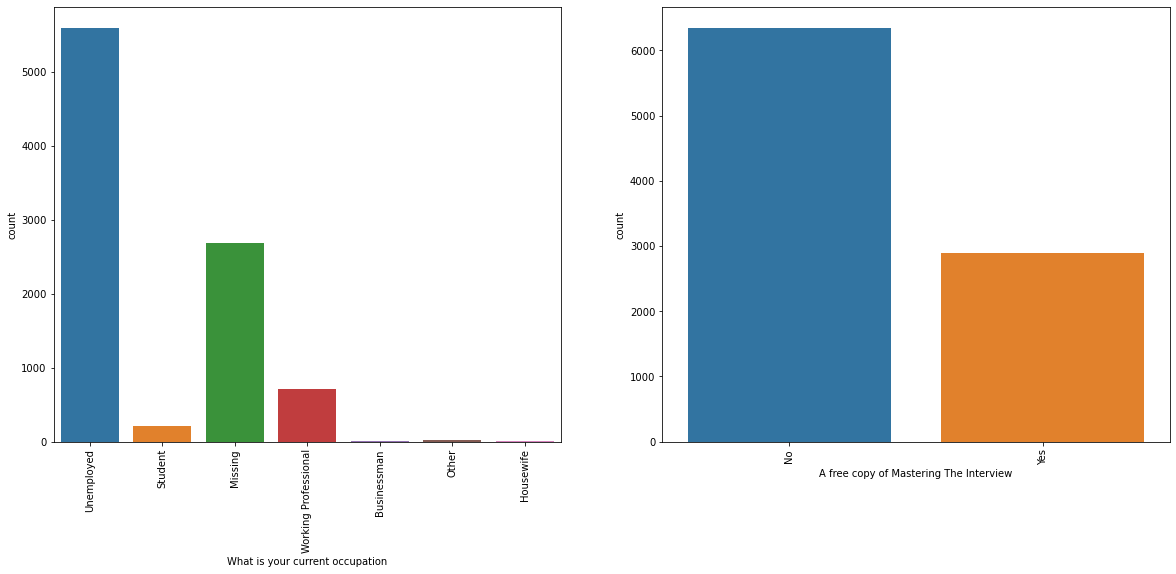

In [62]:
makePlots("What is your current occupation", "A free copy of Mastering The Interview")

Inferences:

Most users, as we can see, are jobless. 

majority of the users declined the copy of mastering the interview even though it's available for free.

In [63]:
#now let's look at the numerical variables

In [64]:
def makePlots2(name, title):
    sns.displot(lead[name])
    plt.title(title)
    plt.show()

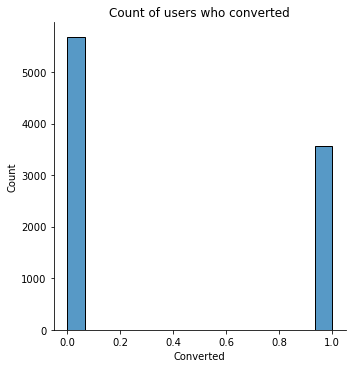

In [65]:
makePlots2("Converted", "Count of users who converted")

Close to 3500 users converted

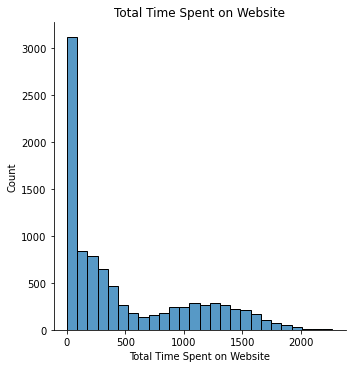

In [66]:
makePlots2("Total Time Spent on Website", "Total Time Spent on Website")

Most people do not spend a lot of time on the website. 

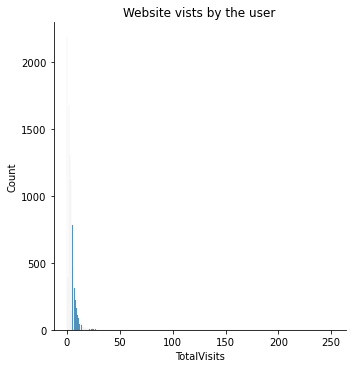

In [67]:
makePlots2("TotalVisits", "Website vists by the user")

We see most people do not even visit the website. 

## Segregating categories based on the variable 'converted'

In [68]:
def huePlots(name, title):
    plt.figure(figsize = [16, 6])
    sns.countplot(data = lead, x = name, hue = "Converted")
    plt.xticks(rotation = 90)
    plt.title(title)
    plt.show()

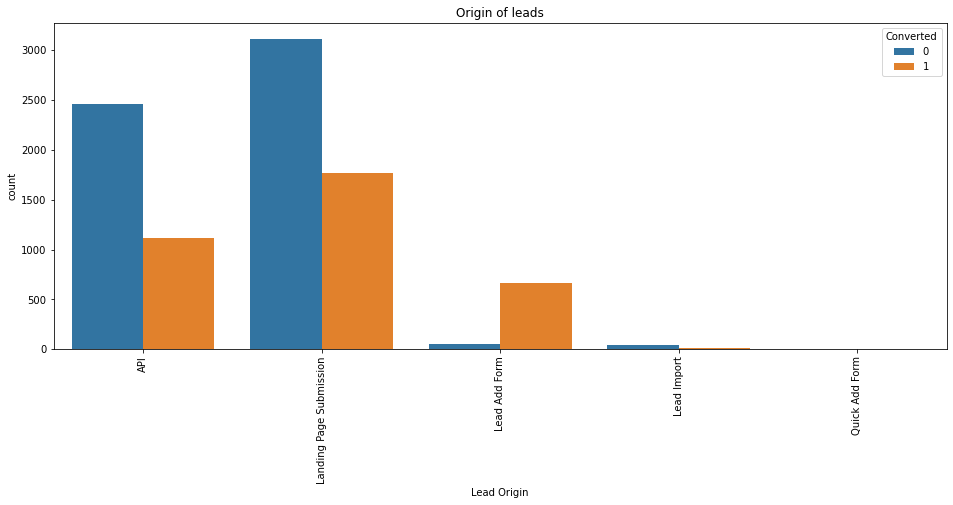

In [69]:
huePlots("Lead Origin", "Origin of leads")

Inferences:

Most conversions occur when origin of the lead is landing page submission. 

Ratio wise, we see Lead Add Form has an extensive rate of conversion.

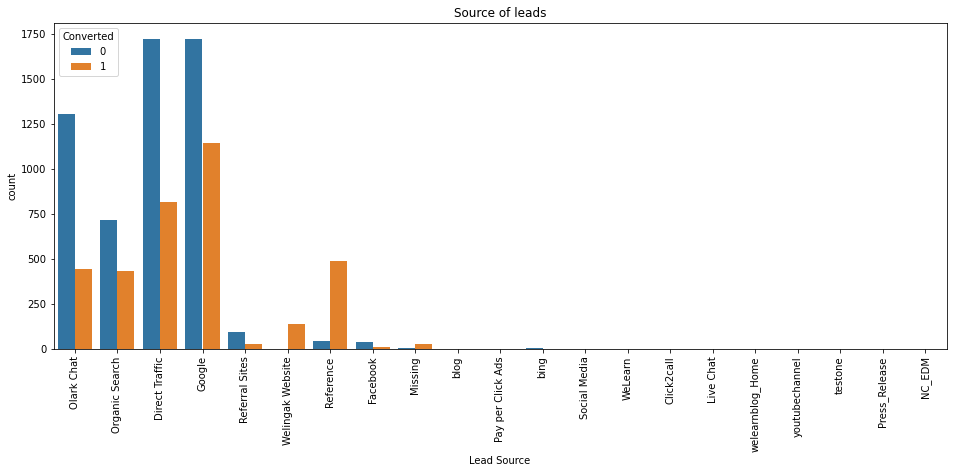

In [70]:
huePlots("Lead Source", "Source of leads")

Inferences:

Most conversions occur when lead source is Google.

'Reference' has a very good conversion rate. Same could be said for 'Welkingak website' where everybody has converted.

Ratio-wise, 'Olark chat' has the poorest conversion rate.

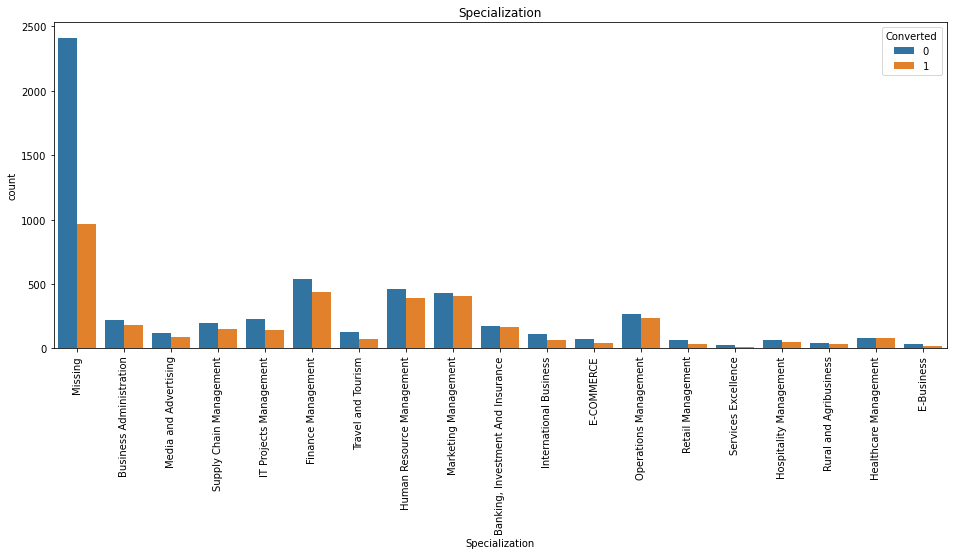

In [71]:
huePlots("Specialization", "Specialization")

Even from the missing data, we can see a lot of conversions. 

All management related specializations have good amount of conversions (Finance, HR, Marketing, Operations etc.)

Banking, Investment and Insurance have a close conversion/non-conversion rate.

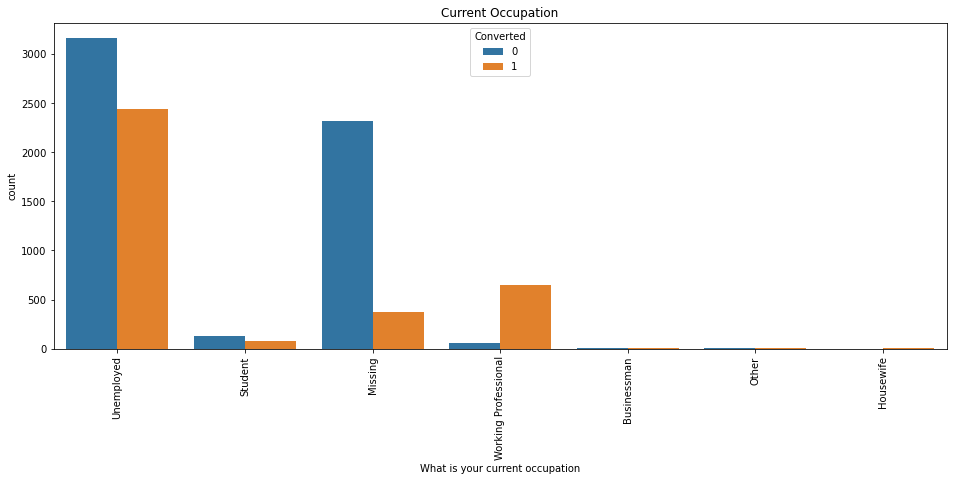

In [72]:
huePlots("What is your current occupation", "Current Occupation")

Most working professionals tend to convert.

Unemployed users have the highest amount of conversions.

The number of students appear to be very less.

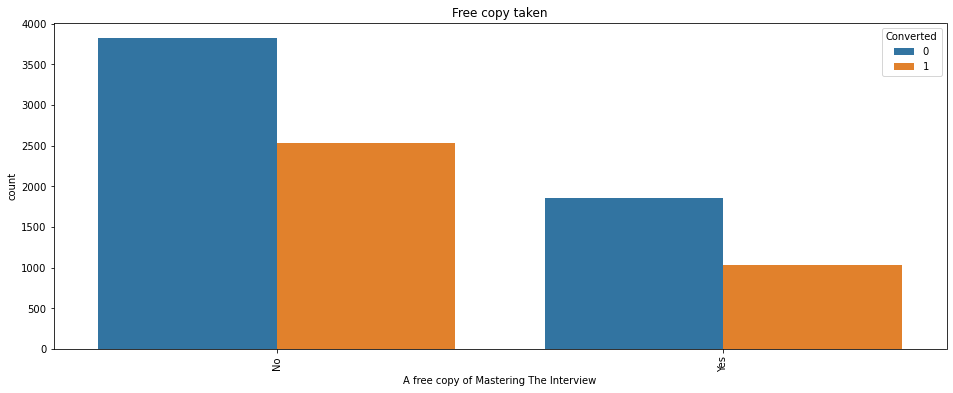

In [73]:
huePlots("A free copy of Mastering The Interview", "Free copy taken") 

Ratio-wise, this data looks very similar (Similar conversions and non-conversions). 



In [75]:
heatmapData = lead.corr()

<AxesSubplot:>

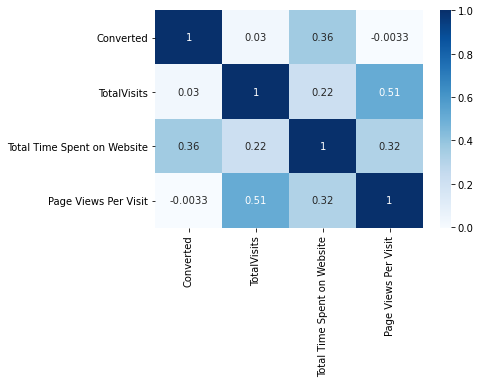

In [76]:
sns.heatmap(heatmapData, cmap = "Blues", annot = True)

1. Conversion rate is notably higher when users spend more time on their website
2. Total visits and page views per visit have a high correlation
3. Page views per visit and converted almost have no correlation

# 3. Getting the data ready and performing Test-Train Split

### Creating dummy variables to get the data ready for analysis

In [77]:
#checking for outliers first

numericalVariables = lead[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]]
numericalVariables.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.995, 0.999])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.445238,487.698268,2.362820
std,4.818723,548.021466,2.145333
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


TotalVisits needs to be treated. Rest of the variables look okay

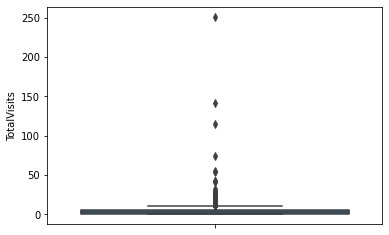

In [78]:
#boxplot for TotalVisits

sns.boxplot(y = lead["TotalVisits"])
plt.show()

"TotalVisits" has outliers as seen from the percentile distribution and its boxplot

In [79]:
#removing outliers from TotalVists

Quarter3 = lead["TotalVisits"].quantile(0.999)
lead = lead[lead["TotalVisits"] <= Quarter3]

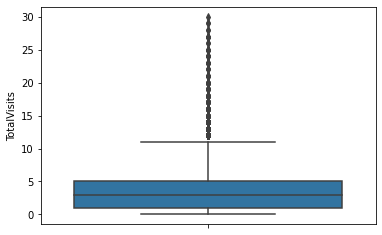

In [80]:
sns.boxplot(y = lead["TotalVisits"])
plt.show()

The distribution is normal now and the outliers have been treated.

In [81]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9230 non-null   object 
 1   Lead Source                             9230 non-null   object 
 2   Converted                               9230 non-null   int64  
 3   TotalVisits                             9230 non-null   float64
 4   Total Time Spent on Website             9230 non-null   int64  
 5   Page Views Per Visit                    9230 non-null   float64
 6   Specialization                          9230 non-null   object 
 7   What is your current occupation         9230 non-null   object 
 8   A free copy of Mastering The Interview  9230 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 721.1+ KB


As seen before, the column "A free copy of Mastering The Interview" has values as yes/no. We can convert it 1 and 0 so that it can be used for analysis.

In [82]:
def mapping(x):
    return x.map({'Yes': 1, 'No': 0})

column = ["A free copy of Mastering The Interview"]

lead[column] = lead[column].apply(mapping)

In [83]:
lead[column].head()

,A free copy of Mastering The Interview
0,0
1,0
2,1
3,0
4,0


Mapping is complete

In [84]:
#creating dummy variables for categorical variables

dumVarList = ["Lead Origin", "Lead Source", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]

dummyVariables = pd.get_dummies(lead[dumVarList], drop_first = True)

leadFinal = pd.concat([lead, dummyVariables], axis = 1)

In [174]:
leadFinal.shape

(9230, 49)

In [177]:
#updated ratio of data
len(leadFinal)/9240*100

99.89177489177489

In [86]:
leadFinal.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,A free copy of Mastering The Interview,...,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,API,Olark Chat,0,0.0,0,0.0,Missing,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674,2.5,Missing,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,1,1,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Missing,Unemployed,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
leadFinal.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9230 non-null   object 
 1   Lead Source                                           9230 non-null   object 
 2   Converted                                             9230 non-null   int64  
 3   TotalVisits                                           9230 non-null   float64
 4   Total Time Spent on Website                           9230 non-null   int64  
 5   Page Views Per Visit                                  9230 non-null   float64
 6   Specialization                                        9230 non-null   object 
 7   What is your current occupation                       9230 non-null   object 
 8   A free copy of Mastering The Interview                9230

In [88]:
#dropping extra or unwanted variables

unwantedCols = ["Lead Origin", "Lead Source", "Specialization", "What is your current occupation", "A free copy of Mastering The Interview", "Specialization_Missing", "What is your current occupation_Missing", "Lead Source_Missing"]

leadFinal = leadFinal.drop(unwantedCols, axis = 1)

In [89]:
leadFinal.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
from sklearn.model_selection import train_test_split #to perform train-test split on the data set

In [91]:
#creating our x variable
X = leadFinal.drop(["Converted"], axis = 1)

In [92]:
X.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9230 non-null   float64
 1   Total Time Spent on Website                           9230 non-null   int64  
 2   Page Views Per Visit                                  9230 non-null   float64
 3   Lead Origin_Landing Page Submission                   9230 non-null   uint8  
 4   Lead Origin_Lead Add Form                             9230 non-null   uint8  
 5   Lead Origin_Lead Import                               9230 non-null   uint8  
 6   Lead Origin_Quick Add Form                            9230 non-null   uint8  
 7   Lead Source_Direct Traffic                            9230 non-null   uint8  
 8   Lead Source_Facebook                                  9230

In [93]:
#creating our y variable
y = leadFinal["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [94]:
y.shape

(9230,)

In [95]:
np.random.seed(0) #so that test and train data have the same rows
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [96]:
#import scaler to perform scaling on the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#scaling needs to be done only on the numerical features

X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5537,0.066667,0.055018,0.083333,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7059,0.266667,0.423856,0.333333,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
712,0.033333,0.066461,0.041667,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3938,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3429,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#looking at conversion rate

convert = (sum(lead["Converted"])/len(lead["Converted"].index))*100
convert

38.569880823401945

We see an okay conversion rate

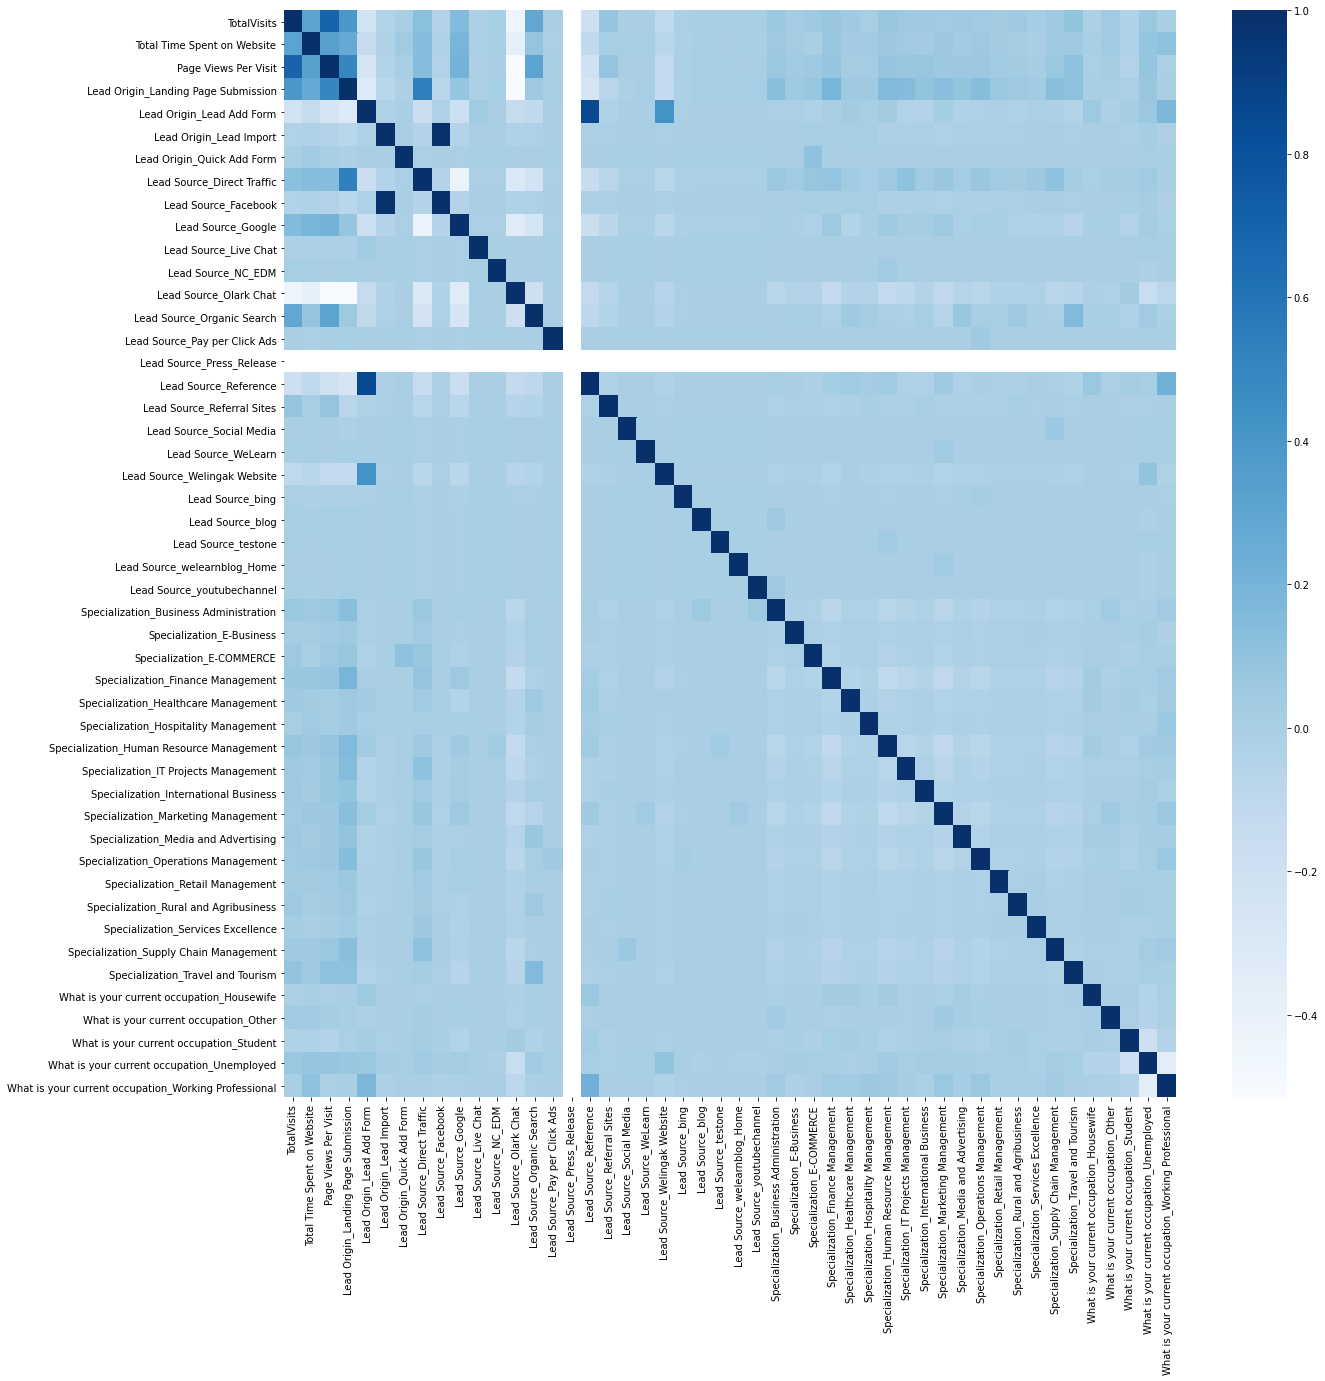

In [98]:
plt.figure(figsize = [20, 20])
sns.heatmap(X_train.corr(), cmap = "Blues")
plt.show()

It is very difficult to remove unwanted features by looking at this heatmap alone. We can do it using RFE (Recursive Feature Elimination)

# 4. Model Building

In [99]:
#time to perform logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [100]:
#Importing RFE to remove unwanted variables

from sklearn.feature_selection import RFE

In [101]:
rfe = RFE(logreg, 15) #15 variables as output
rfe = rfe.fit(X_train, y_train)

In [102]:
#let's have a look at the features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Origin_Quick Add Form', False, 32),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 25),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 34),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_blog', False, 27),
 ('Lead Source_testone', False, 7),
 ('Lead Source_welearnblog_Home', False, 30),
 ('Lea

Now we have a list of all the columns that we need to include in our model building.

All the columns with rfe ranking > 1 need to be excluded

In [103]:
colsRank1 = X_train.columns[rfe.support_]

In [104]:
colsRank1

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [105]:
colsRank1.shape

(15,)

In [106]:
X_train = X_train[colsRank1]

In [107]:
import statsmodels.api as sm

#adding a constant to X_train
X_train_sm = sm.add_constant(X_train)

logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2898.3
Date:                Tue, 08 Feb 2022   Deviance:                       5796.5
Time:                        13:33:42   Pearson chi2:                 7.08e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2221      0.093    -23.773      0.000      -2.405      -2.039
TotalVisits                                              1.8125      0.404      4.482      0.000       1.020       2.605
Total Time Spent on Website                              4.6444      0.159     29.187      0.000       4.332       4.956
Page Views Per Visit                                    -1.1277      0.565     -1.995      0.046      -2.235      -0.020
Lead Origin_Lead Add Form                                2.3174      0.183     12.662      0.000       1.959       2.676
Lead Source_Direct Traffic                              -1.3505      0.121    -11.164      0.000      -1.588      -1.113
Lead Source_Facebook                                    -1.0809      0.491     -2.200      0.028      -2.044      -0.118
Lead Source_Google                                      -0.8874      0.117     -7.577      0.000      -1.117      -0.658
Lead Source_Organic Search                              -1.1076      0.147     -7.519      0.000      -1.396      -0.819
Lead Source_Referral Sites                              -1.3369      0.325     -4.120      0.000      -1.973      -0.701
Lead Source_Welingak Website                             2.2267      0.735      3.031      0.002       0.787       3.666
What is your current occupation_Housewife               23.8036   1.44e+04      0.002      0.999   -2.83e+04    2.83e+04
What is your current occupation_Other                    1.6115      0.657      2.453      0.014       0.324       2.899
What is your current occupation_Student                  1.1619      0.217      5.355      0.000       0.737       1.587
What is your current occupation_Unemployed               1.4025      0.084     16.730      0.000       1.238       1.567
What is your current occupation_Working Professional     3.7527      0.179     20.923      0.000       3.401       4.104
========================================================================================================================
"""

In [108]:
#checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.48
0,TotalVisits,4.02
6,Lead Source_Google,3.01
4,Lead Source_Direct Traffic,2.68
13,What is your current occupation_Unemployed,2.64
1,Total Time Spent on Website,2.26
7,Lead Source_Organic Search,2.23
3,Lead Origin_Lead Add Form,1.62
14,What is your current occupation_Working Profes...,1.33
9,Lead Source_Welingak Website,1.26


In [110]:
#removing What is your current occupation_Housewife as it has a high p-value

X_train.drop("What is your current occupation_Housewife", axis = 1, inplace = True)

In [111]:
X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2907.7
Date:                Tue, 08 Feb 2022   Deviance:                       5815.5
Time:                        13:33:42   Pearson chi2:                 7.13e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2027      0.093    -23.721      0.000      -2.385      -2.021
TotalVisits                                              1.7932      0.404      4.441      0.000       1.002       2.585
Total Time Spent on Website                              4.6391      0.159     29.211      0.000       4.328       4.950
Page Views Per Visit                                    -1.1331      0.564     -2.008      0.045      -2.239      -0.027
Lead Origin_Lead Add Form                                2.3678      0.183     12.942      0.000       2.009       2.726
Lead Source_Direct Traffic                              -1.3385      0.121    -11.087      0.000      -1.575      -1.102
Lead Source_Facebook                                    -1.0739      0.491     -2.186      0.029      -2.036      -0.111
Lead Source_Google                                      -0.8759      0.117     -7.494      0.000      -1.105      -0.647
Lead Source_Organic Search                              -1.0908      0.147     -7.421      0.000      -1.379      -0.803
Lead Source_Referral Sites                              -1.3286      0.324     -4.100      0.000      -1.964      -0.693
Lead Source_Welingak Website                             2.1845      0.735      2.974      0.003       0.745       3.624
What is your current occupation_Other                    1.5867      0.657      2.416      0.016       0.299       2.874
What is your current occupation_Student                  1.1336      0.217      5.226      0.000       0.708       1.559
What is your current occupation_Unemployed               1.3750      0.083     16.559      0.000       1.212       1.538
What is your current occupation_Working Professional     3.7242      0.179     20.807      0.000       3.373       4.075
========================================================================================================================
"""

In [112]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.48
0,TotalVisits,4.02
6,Lead Source_Google,3.01
4,Lead Source_Direct Traffic,2.67
12,What is your current occupation_Unemployed,2.63
1,Total Time Spent on Website,2.26
7,Lead Source_Organic Search,2.23
3,Lead Origin_Lead Add Form,1.61
13,What is your current occupation_Working Profes...,1.33
9,Lead Source_Welingak Website,1.26


In [113]:
#dropping Page Views Per Visit

X_train.drop("Page Views Per Visit", axis = 1, inplace = True)

In [114]:
X_train_sm = sm.add_constant(X_train)

logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2909.8
Date:                Tue, 08 Feb 2022   Deviance:                       5819.5
Time:                        13:33:42   Pearson chi2:                 7.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2043      0.093    -23.738      0.000      -2.386      -2.022
TotalVisits                                              1.3659      0.345      3.961      0.000       0.690       2.042
Total Time Spent on Website                              4.6234      0.158     29.180      0.000       4.313       4.934
Lead Origin_Lead Add Form                                2.3682      0.183     12.940      0.000       2.010       2.727
Lead Source_Direct Traffic                              -1.4058      0.116    -12.097      0.000      -1.634      -1.178
Lead Source_Facebook                                    -1.1049      0.492     -2.247      0.025      -2.068      -0.141
Lead Source_Google                                      -0.9515      0.111     -8.578      0.000      -1.169      -0.734
Lead Source_Organic Search                              -1.1927      0.138     -8.631      0.000      -1.464      -0.922
Lead Source_Referral Sites                              -1.4219      0.322     -4.422      0.000      -2.052      -0.792
Lead Source_Welingak Website                             2.1869      0.735      2.977      0.003       0.747       3.627
What is your current occupation_Other                    1.6041      0.657      2.441      0.015       0.316       2.892
What is your current occupation_Student                  1.1354      0.217      5.236      0.000       0.710       1.560
What is your current occupation_Unemployed               1.3723      0.083     16.528      0.000       1.210       1.535
What is your current occupation_Working Professional     3.7194      0.179     20.790      0.000       3.369       4.070
========================================================================================================================
"""

In [115]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.91
11,What is your current occupation_Unemployed,2.63
5,Lead Source_Google,2.53
3,Lead Source_Direct Traffic,2.33
1,Total Time Spent on Website,2.25
6,Lead Source_Organic Search,1.87
2,Lead Origin_Lead Add Form,1.61
12,What is your current occupation_Working Profes...,1.33
8,Lead Source_Welingak Website,1.26
7,Lead Source_Referral Sites,1.08


In [116]:
#dropping Lead Source_Facebook

X_train.drop("Lead Source_Facebook", axis = 1, inplace = True)

In [117]:
X_train_sm = sm.add_constant(X_train)

logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.7
Date:                Tue, 08 Feb 2022   Deviance:                       5825.4
Time:                        13:33:43   Pearson chi2:                 7.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2289      0.093    -24.055      0.000      -2.410      -2.047
TotalVisits                                              1.3353      0.344      3.879      0.000       0.661       2.010
Total Time Spent on Website                              4.6115      0.158     29.141      0.000       4.301       4.922
Lead Origin_Lead Add Form                                2.4006      0.183     13.147      0.000       2.043       2.758
Lead Source_Direct Traffic                              -1.3667      0.115    -11.873      0.000      -1.592      -1.141
Lead Source_Google                                      -0.9128      0.110     -8.311      0.000      -1.128      -0.698
Lead Source_Organic Search                              -1.1521      0.137     -8.400      0.000      -1.421      -0.883
Lead Source_Referral Sites                              -1.3816      0.321     -4.306      0.000      -2.010      -0.753
Lead Source_Welingak Website                             2.1871      0.735      2.977      0.003       0.747       3.627
What is your current occupation_Other                    1.6010      0.657      2.437      0.015       0.313       2.888
What is your current occupation_Student                  1.1290      0.217      5.206      0.000       0.704       1.554
What is your current occupation_Unemployed               1.3644      0.083     16.450      0.000       1.202       1.527
What is your current occupation_Working Professional     3.7104      0.179     20.765      0.000       3.360       4.061
========================================================================================================================
"""

In [118]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.90
10,What is your current occupation_Unemployed,2.59
4,Lead Source_Google,2.51
3,Lead Source_Direct Traffic,2.31
1,Total Time Spent on Website,2.25
5,Lead Source_Organic Search,1.87
2,Lead Origin_Lead Add Form,1.60
11,What is your current occupation_Working Profes...,1.32
7,Lead Source_Welingak Website,1.26
6,Lead Source_Referral Sites,1.08


In [119]:
#dropping What is your current occupation_Other

X_train.drop("What is your current occupation_Other", axis = 1, inplace = True)

In [120]:
X_train_sm = sm.add_constant(X_train)

logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6461
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2915.7
Date:                Tue, 08 Feb 2022   Deviance:                       5831.5
Time:                        13:33:43   Pearson chi2:                 7.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2161      0.092    -24.029      0.000      -2.397      -2.035
TotalVisits                                              1.3615      0.344      3.954      0.000       0.687       2.036
Total Time Spent on Website                              4.6198      0.158     29.198      0.000       4.310       4.930
Lead Origin_Lead Add Form                                2.4063      0.183     13.180      0.000       2.048       2.764
Lead Source_Direct Traffic                              -1.3620      0.115    -11.841      0.000      -1.587      -1.137
Lead Source_Google                                      -0.9117      0.110     -8.305      0.000      -1.127      -0.697
Lead Source_Organic Search                              -1.1535      0.137     -8.404      0.000      -1.423      -0.885
Lead Source_Referral Sites                              -1.3868      0.321     -4.323      0.000      -2.016      -0.758
Lead Source_Welingak Website                             2.1880      0.735      2.978      0.003       0.748       3.628
What is your current occupation_Student                  1.1101      0.217      5.122      0.000       0.685       1.535
What is your current occupation_Unemployed               1.3448      0.082     16.343      0.000       1.184       1.506
What is your current occupation_Working Professional     3.6910      0.178     20.690      0.000       3.341       4.041
========================================================================================================================
"""

In [121]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.90
9,What is your current occupation_Unemployed,2.58
4,Lead Source_Google,2.51
3,Lead Source_Direct Traffic,2.31
1,Total Time Spent on Website,2.25
5,Lead Source_Organic Search,1.87
2,Lead Origin_Lead Add Form,1.60
10,What is your current occupation_Working Profes...,1.32
7,Lead Source_Welingak Website,1.26
6,Lead Source_Referral Sites,1.08


Everything is looking okay now. All p-values are below 0.005 and VIF's are well below 5.

# 5. Making Predictions

In [122]:
#predicting probabilities on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

5537    0.191849
7059    0.631393
712     0.193012
3938    0.294994
3429    0.098317
7539    0.252390
5190    0.127456
4331    0.627896
6215    0.365591
1050    0.627639
dtype: float64

In [123]:
#reshaping the y_train_pred variable into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.19184878, 0.6313928 , 0.19301182, ..., 0.97979211, 0.22262907,
       0.63811687])

In [124]:
#Displaying the probabilities

y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Conversion Probability": y_train_pred})

In [125]:
y_train_pred_final.head(30)

,Converted,Conversion Probability
0,0,0.191849
1,0,0.631393
2,0,0.193012
3,0,0.294994
4,0,0.098317
5,1,0.252390
6,1,0.127456
7,1,0.627896
8,0,0.365591
9,1,0.627639


In [126]:
#using the default cutoff: 0.5

y_train_pred_final["Predicted"] = y_train_pred_final["Conversion Probability"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(15)

,Converted,Conversion Probability,Predicted
0,0,0.191849,0
1,0,0.631393,1
2,0,0.193012,0
3,0,0.294994,0
4,0,0.098317,0
5,1,0.252390,0
6,1,0.127456,0
7,1,0.627896,1
8,0,0.365591,0
9,1,0.627639,1


# 6. Model Evaluation

In [127]:
from sklearn import metrics

In [128]:
#creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3558,  445],
       [ 856, 1602]], dtype=int64)

In [129]:
#SO WE HAVE

#Predcited     not_converted   converted
#actual

#not_converted  3558            445
#converted      856             1602 

In [130]:
#checking the accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100

79.86379817365733

We can see a decent accuracy score of almost 80%

In [131]:
#True Positives
TP = confusion[1,1]

#True Negatives
TN = confusion[0,0]

#False Positives
FP = confusion[0,1]

#False Negatives
FN = confusion[1,0]

In [132]:
#Sensitivity

TP/(TP+FN)*100

65.17493897477624

In [133]:
#Specificity
TN/(TN+FP)*100

88.88333749687735

# 6. Plotting the ROC Curve and finding optimal cut off

In [134]:
#we had set the cutoff as 0.5 but we need to find the optimum cut off to further enhance our model

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = [5, 5])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = "lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion Probability"], drop_intermediate = False)

#drop_intermediate: Whether to drop some suboptimal thresholds which would not appear on a plotted ROC curve. This is useful in order to create lighter ROC curves.

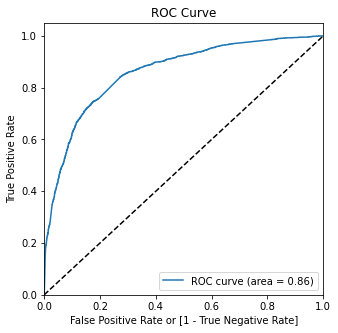

In [136]:
#plotting the ROC Curve

draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Conversion Probability"])

Area under the curve is 0.86, which is a very good value.

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Conversion Probability"].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.191849,0,1,1,0,0,0,0,0,0,0,0
1,0,0.631393,1,1,1,1,1,1,1,1,0,0,0
2,0,0.193012,0,1,1,0,0,0,0,0,0,0,0
3,0,0.294994,0,1,1,1,0,0,0,0,0,0,0
4,0,0.098317,0,1,0,0,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0, 0.1, 0.2 ,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.380436,1.000000,0.000000
0.1,0.1,0.572357,0.969081,0.328753
0.2,0.2,0.698189,0.902766,0.572571
0.3,0.3,0.788423,0.756306,0.808144
0.4,0.4,0.800031,0.707486,0.856857
0.5,0.5,0.798638,0.651749,0.888833
0.6,0.6,0.785173,0.576078,0.913565
0.7,0.7,0.767219,0.483727,0.941294
0.8,0.8,0.739359,0.370220,0.966025
0.9,0.9,0.691224,0.201383,0.992006


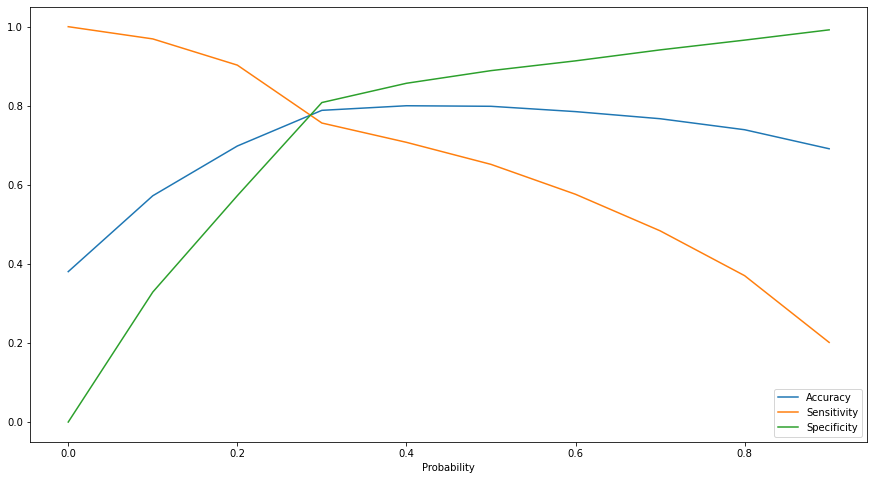

In [139]:
plt.rcParams["figure.figsize"] = [15, 8]
fig = cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

From the above curve, 0.30 looks like the optimum cutoff point.

In [140]:
y_train_pred_final["OptimumPrediction"] = y_train_pred_final["Conversion Probability"].map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head(20)

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,OptimumPrediction
0,0,0.191849,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.631393,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.193012,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.294994,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.098317,0,1,0,0,0,0,0,0,0,0,0,0
5,1,0.252390,0,1,1,1,0,0,0,0,0,0,0,0
6,1,0.127456,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.627896,1,1,1,1,1,1,1,1,0,0,0,1
8,0,0.365591,0,1,1,1,1,0,0,0,0,0,0,1
9,1,0.627639,1,1,1,1,1,1,1,1,0,0,0,1


In [141]:
#new accuracy

metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["OptimumPrediction"])*100

78.84228447608729

In [142]:
#confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["OptimumPrediction"])

confusion2

array([[3235,  768],
       [ 599, 1859]], dtype=int64)

In [143]:
#SO WE HAVE

#Predcited     not_converted   converted
#actual

#not_converted  3235            768
#converted      599             1859 

In [144]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [145]:
#Sensitivity

TP/(TP+FN)*100

75.63059397884459

In [146]:
#Speicificty

TN/(TN+FP)*100

80.81438920809393

So we have, with the current cutoff as 0.30:

1. Accuracy: 78.8%
2. Sensitivity: 75.63%
3. Specificity: 80.81%

# Precision & Recall

In [147]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["OptimumPrediction"])

confusion

array([[3235,  768],
       [ 599, 1859]], dtype=int64)

In [148]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [149]:
#Precision

TP/(TP + FP)*100

70.76513132851161

In [150]:
#Recall

TP/(TP+FN)*100

75.63059397884459

In [151]:
#we can perform the same operations using sklearn

from sklearn.metrics import precision_score, recall_score

In [152]:
precision_score(y_train_pred_final["Converted"], y_train_pred_final["OptimumPrediction"])

0.7076513132851161

In [153]:
recall_score(y_train_pred_final["Converted"], y_train_pred_final["OptimumPrediction"])

0.7563059397884458

#### In both cases the valus are the same. We can see our precision is 70.76% and Recall is 75.63%

# Precision and Recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Converted, y_train_pred_final.OptimumPrediction

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       1
 7       1
 8       0
 9       1
 10      0
 11      0
 12      0
 13      0
 14      0
 15      1
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      1
 25      1
 26      1
 27      0
 28      0
 29      1
 30      0
 31      1
 32      1
 33      0
 34      1
 35      0
 36      1
 37      1
 38      1
 39      1
 40      0
 41      0
 42      1
 43      0
 44      0
 45      0
 46      0
 47      1
 48      0
 49      0
 50      0
 51      0
 52      0
 53      0
 54      0
 55      1
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      1
 63      0
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      1
 72      1
 73      0
 74      1
 75      0
 76      1
 77      1
 78      1
 79      0
 80      1
 81      1
 82      0
 83      0
 84      1
 85      0
 86      1
 87      1
 88      0
 89      0
 90      0

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Conversion Probability"])

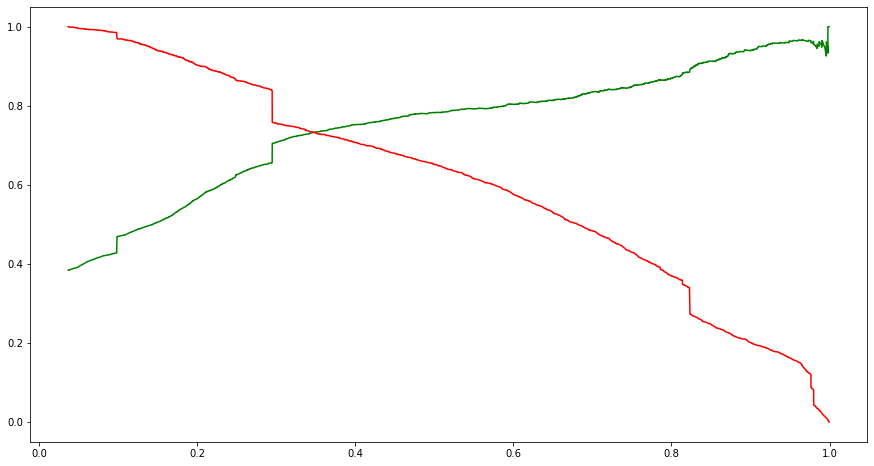

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 7. Making predictions on the test set

In [158]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2769 entries, 6410 to 6534
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           2769 non-null   float64
 1   Total Time Spent on Website                           2769 non-null   int64  
 2   Page Views Per Visit                                  2769 non-null   float64
 3   Lead Origin_Landing Page Submission                   2769 non-null   uint8  
 4   Lead Origin_Lead Add Form                             2769 non-null   uint8  
 5   Lead Origin_Lead Import                               2769 non-null   uint8  
 6   Lead Origin_Quick Add Form                            2769 non-null   uint8  
 7   Lead Source_Direct Traffic                            2769 non-null   uint8  
 8   Lead Source_Facebook                                  2

In [159]:
#scaling the numerical variables of the test set

X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]])

In [160]:
#retrieving all the columns from the final train model
col = X_train.columns

In [161]:
X_test = X_test[col]

#adding the constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
6410,1.0,0.100000,0.226673,0,0,1,0,0,0,0,1,0
6435,1.0,0.300000,0.649208,0,0,1,0,0,0,0,1,0
1520,1.0,0.400000,0.153169,0,0,1,0,0,0,0,1,0
6589,1.0,0.166667,0.077905,0,0,1,0,0,0,0,1,0
6889,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0


In [162]:
#Storing the predictions of the test
y_test_pred = result.predict(X_test_sm)

#Converting it to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

#Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)

#removing index
y_pred_df.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

#Appending them together
y_pred_final = pd.concat([y_test_df, y_pred_df], axis = 1)

y_pred_final.head(10)

,Converted,0
0,0,0.354423
1,1,0.835436
2,0,0.370335
3,0,0.232159
4,0,0.098317
5,1,0.205372
6,1,0.294994
7,1,0.477623
8,1,0.294994
9,0,0.049438


In [163]:
#renaming the column

y_pred_final = y_pred_final.rename(columns = {0: "Conversion Probability"})

In [164]:
y_pred_final.head(10)

,Converted,Conversion Probability
0,0,0.354423
1,1,0.835436
2,0,0.370335
3,0,0.232159
4,0,0.098317
5,1,0.205372
6,1,0.294994
7,1,0.477623
8,1,0.294994
9,0,0.049438


In [165]:
#making predictions (cutoff as 0.38)

y_pred_final["OptimumPrediction"] = y_pred_final["Conversion Probability"].map(lambda x: 1 if x > 0.38 else 0)

y_pred_final.head()

,Converted,Conversion Probability,OptimumPrediction
0,0,0.354423,0
1,1,0.835436,1
2,0,0.370335,0
3,0,0.232159,0
4,0,0.098317,0


In [166]:
#calculating accuracy

metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["OptimumPrediction"])*100

79.12603828096786

In [167]:
#creating the confusion matrix

confusion_test = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["OptimumPrediction"])

confusion_test

array([[1409,  258],
       [ 320,  782]], dtype=int64)

In [168]:
TP = confusion_test[1,1]
TN = confusion_test[0,0]
FP = confusion_test[0,1] 
FN = confusion_test[1,0]

In [169]:
#sensitivity 

TP/(TP+FN)*100

70.96188747731398

In [170]:
#specificity

TN/(TN+FP)*100

84.52309538092382

In [171]:
#precision
precision_score(y_pred_final["Converted"], y_pred_final["OptimumPrediction"])*100

75.1923076923077

In [172]:
#recall
recall_score(y_pred_final["Converted"], y_pred_final["OptimumPrediction"])*100

70.96188747731398

## FINAL TEST RESULT:

Accuracy: 79.12%
Sensitivity: 70.96%
Specificity: 84.52%
Precision: 75.19%
Recall: 70.96%